In [1]:
# 2. Disease prediction (bonus)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# read the data
df_heart=pd.read_csv('Data3/cardio_train.csv', delimiter=';', index_col=0)

In [4]:
# df_heart
# df_heart.info()
df_heart

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


Utforska om det finns några konstigheter i datan

In [43]:
# df_heart['active'].describe() # Ok
# df_heart['alco'].describe() # ok
# df_heart['cardio'].describe() # ok
# df_heart['cholesterol'].describe() # 0k
# df_heart['age'].describe() # ok
# df_heart['gender']. value_counts() # Ok
# df_heart['gluc'].value_counts() # Ok
# df_heart['smoke'].value_counts() # Ok


# df_heart['ap_hi'].describe() # - investigate, min value
# df_heart['ap_lo'].describe() # - investigate, min value
# df_heart['height'].describe() # - investigate, min value 55?
# df_heart['weight'].describe() # - investigate, min 10, max 200?

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

# 2.0 - EDA uppvärmning

## a) Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?

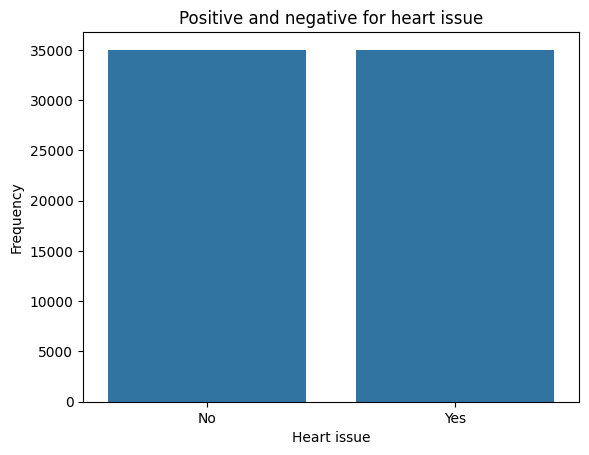

In [11]:

df_heart['Cardio'] = df_heart['cardio'].replace({0: 'No', 1: 'Yes'})
sns.countplot(x='Cardio', data=df_heart)

# Add labels and title
plt.xlabel('Heart issue')
plt.ylabel('Frequency')
plt.title('Positive and negative for heart issue')

plt.show()

In [6]:
df_heart['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

b) Hur stor andel har normala, över normala och långt över normala kolesterolvärden? Rita ett tårtdiagram.

In [13]:
# under 2 är normalt  (200 mg/dL)
# mellan 2 och 2.4 är högt
# över 2.4 är långt över normala
# 1: normal, 2: above normal, 3: well above normal 

df_heart['cholesterol'].value_counts()

cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64